2/2 [==============================] - 0s 3ms/step
Epoch 0, D Loss: 1.0024396777153015, G Loss: 1.2825195789337158
2/2 [==============================] - 0s 5ms/step
Epoch 100, D Loss: 0.09374500811100006, G Loss: 3.5790696144104004
2/2 [==============================] - 0s 3ms/step
Epoch 200, D Loss: 0.021276815328747034, G Loss: 5.136061668395996
2/2 [==============================] - 0s 2ms/step
Epoch 300, D Loss: 0.0064180390909314156, G Loss: 5.782865524291992
2/2 [==============================] - 0s 2ms/step
Epoch 400, D Loss: 0.011673242319375277, G Loss: 6.381009578704834
2/2 [==============================] - 0s 2ms/step


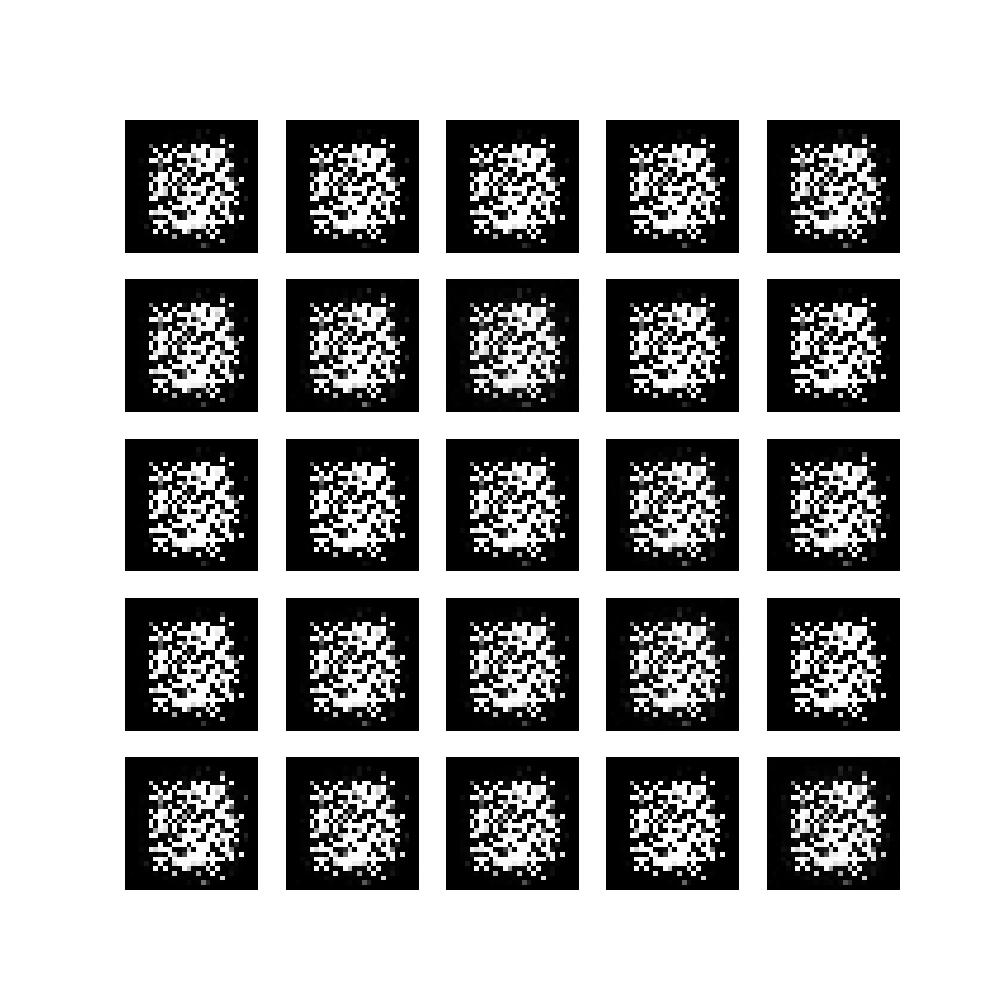

In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models
from IPython.display import Image, display
import matplotlib.pyplot as plt
import numpy as np
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '0'  # or any {'0', '1', '2'}
def build_generator(latent_dim):
    model = models.Sequential()
    model.add(layers.Dense(128, input_dim=latent_dim, activation='relu'))
    model.add(layers.Dense(784, activation='sigmoid'))
    model.add(layers.Reshape((28, 28, 1)))
    return model
# Discriminator model
def build_discriminator(img_shape):
    model = models.Sequential()
    model.add(layers.Flatten(input_shape=img_shape))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    return model
# Combined model (GAN)
def build_gan(generator, discriminator):
    discriminator.trainable = False
    model = models.Sequential()
    model.add(generator)
    model.add(discriminator)
    return model
# Compile discriminator
img_shape = (28, 28, 1)
discriminator = build_discriminator(img_shape)
discriminator.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Compile GAN
latent_dim = 100
generator = build_generator(latent_dim)
discriminator.trainable = False
gan = build_gan(generator, discriminator)
gan.compile(loss='binary_crossentropy', optimizer='adam')
# Load and preprocess dataset (example: MNIST)
(train_images, _), (_, _) = tf.keras.datasets.mnist.load_data()
train_images = train_images / 255.0  # Normalize pixel values to [0, 1]
train_images = np.expand_dims(train_images, axis=-1)
# Training loop
batch_size = 64
epochs = 500
for epoch in range(epochs):
    # Train discriminator
    idx = np.random.randint(0, train_images.shape[0], batch_size)
    real_imgs = train_images[idx]
    labels_real = np.ones((batch_size, 1))
    noise = np.random.normal(0, 1, (batch_size, latent_dim))
    generated_imgs = generator.predict(noise)
    labels_fake = np.zeros((batch_size, 1))
    d_loss_real = discriminator.train_on_batch(real_imgs, labels_real,)
    d_loss_fake = discriminator.train_on_batch(generated_imgs, labels_fake, )
    d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)
    # Train generator
    noise = np.random.normal(0, 1, (batch_size, latent_dim))
    labels_gan = np.ones((batch_size, 1))
    g_loss = gan.train_on_batch(noise, labels_gan)
    # Display progress
    if epoch % 100 == 0:
        print(f"Epoch {epoch}, D Loss: {d_loss[0]}, G Loss: {g_loss}")
        # Generate and save generated images
        generated_images = generator.predict(noise)
        plt.figure(figsize=(10, 10))
        for i in range(25):
            plt.subplot(5, 5, i + 1)
            plt.imshow(generated_images[i, :, :, 0], cmap='gray')
            plt.axis('off')
        plt.savefig(r"C:\Users\vkrit\OneDrive\Pictures\Screenshots\photo-1561731216-c3a4d99437d5.jpg")
        plt.close()    
image_path =r"C:\Users\vkrit\OneDrive\Pictures\Screenshots\photo-1561731216-c3a4d99437d5.jpg"
display(Image(filename=image_path))